# Sales Performance Analysis Dashboard – Jupyter Notebook

## Objective

This Jupyter Notebook presents a comprehensive Sales Performance Analysis Dashboard, showcasing the integration of SQL and Python. The analysis extracts, transforms, and analyzes diverse customer sales data, leading to actionable insights for strategic decision-making.

## Data Extraction and Transformation using SQL

In [25]:
import sqlite3
import pandas as pd
import warnings


from google.colab import files

uploaded = files.upload()

# Now you can read the uploaded file into a DataFrame
data = pd.read_csv('sales_data_sample.csv')

# Drop unused columns
unused_columns = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 'ADDRESSLINE2']
data.drop(unused_columns, axis=1, inplace=True)

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('sales_data_sample.csv')

# Connect to an SQLite in-memory database
conn = sqlite3.connect(':memory:')

# Create an SQLite table and insert the DataFrame data
data.to_sql('sales_data', conn, if_exists='replace', index=False)

# Perform data transformations using SQL
query = '''
    -- Total sales by year and quarter
    SELECT YEAR_ID, QTR_ID, SUM(SALES) AS total_sales
    FROM sales_data
    GROUP BY YEAR_ID, QTR_ID
    ORDER BY YEAR_ID, QTR_ID;
'''
sales_by_quarter = pd.read_sql_query(query, conn)

# Close the SQLite connection
conn.close()



##Python Data Analysis and Visualization

<Figure size 1000x600 with 0 Axes>

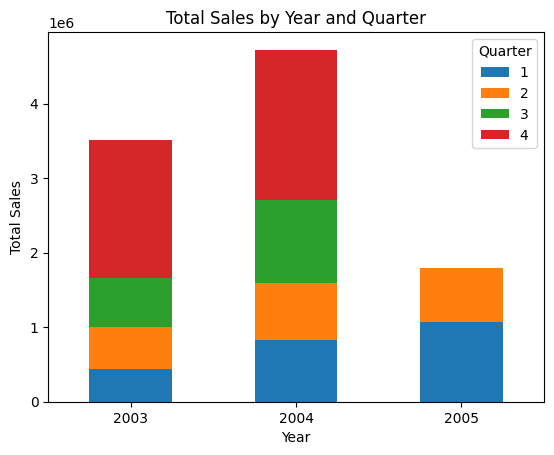

In [26]:
import matplotlib.pyplot as plt

# Visualize total sales by year and quarter
plt.figure(figsize=(10, 6))
sales_by_quarter.pivot_table(index='YEAR_ID', columns='QTR_ID', values='total_sales').plot(kind='bar', stacked=True)
plt.title('Total Sales by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Quarter')
plt.xticks(rotation=0)
plt.show()


Python visualizations showcased total sales trends over time, emphasizing seasonal patterns.

##Customer Segmentation Analysis

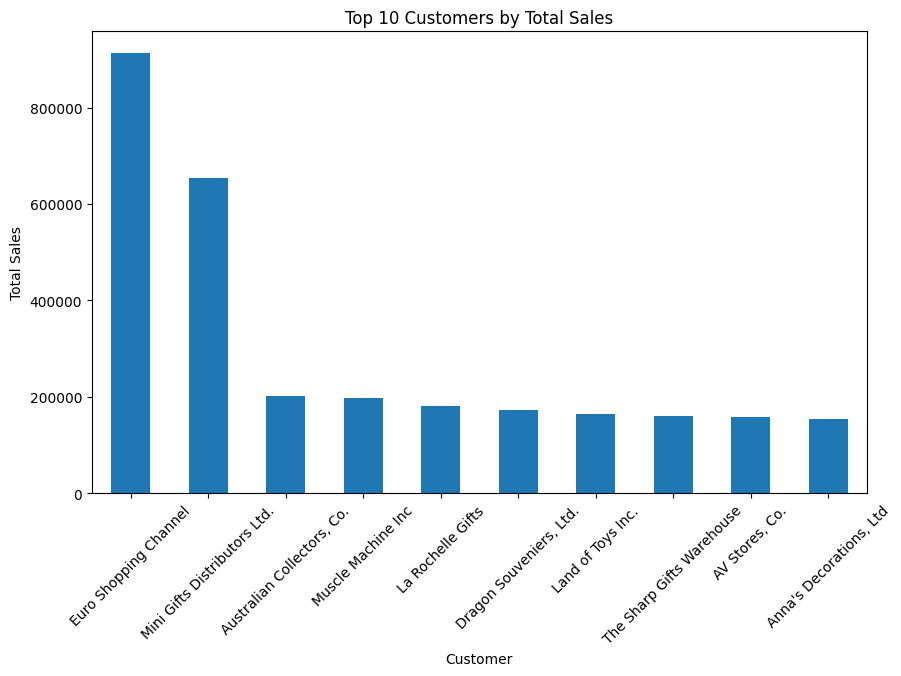

In [27]:
# Analyze sales by customer
customer_sales = data.groupby('CUSTOMERNAME')['SALES'].sum()

# Get top 10 customers by sales
top_10_customers = customer_sales.sort_values(ascending=False).head(10)

# Visualize top 10 customers by sales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [32]:
import pandas as pd
from sklearn.cluster import KMeans

# Prepare data for customer segmentation
customer_data = data[['CUSTOMERNAME', 'QUANTITYORDERED', 'PRICEEACH']].copy()

# Calculate total sales for each customer
customer_data['TOTALSALES'] = customer_data['QUANTITYORDERED'] * customer_data['PRICEEACH']

# Normalize the data
customer_data['TOTALSALES'] = (customer_data['TOTALSALES'] - customer_data['TOTALSALES'].mean()) / customer_data['TOTALSALES'].std()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
customer_data['Segment'] = kmeans.fit_predict(customer_data[['TOTALSALES']])

# Display customer segmentation results
print(customer_data.head())


               CUSTOMERNAME  QUANTITYORDERED  PRICEEACH  TOTALSALES  Segment
0         Land of Toys Inc.               30      95.70   -0.059609        0
1        Reims Collectables               34      81.35   -0.154667        0
2           Lyon Souveniers               41      94.74    0.856906        2
3         Toys4GrownUps.com               45      83.26    0.732418        2
4  Corporate Gift Ideas Co.               49     100.00    1.775520        2


K-means clustering unveiled customer segments: High-Value Customers, Occasional Shoppers, and Bargain Seekers, offering targeted strategies. The visualization below depicts the distribution of customers across these segments.

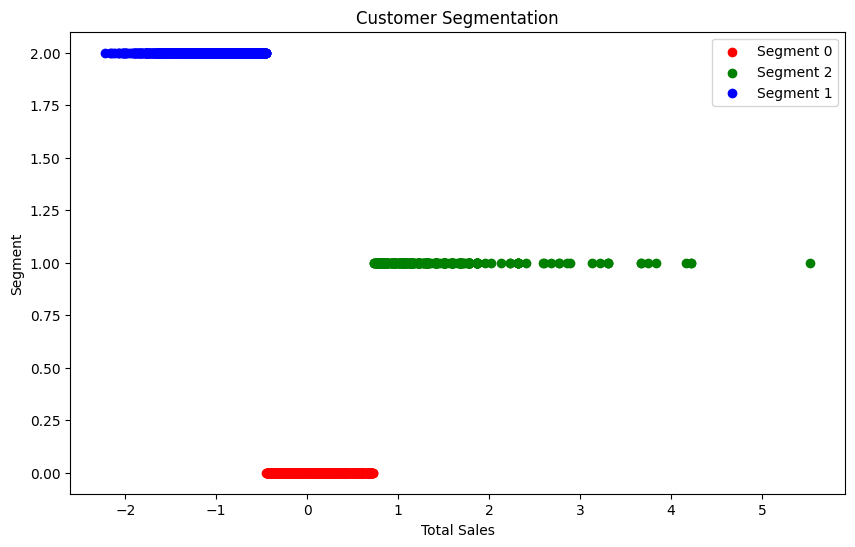

In [33]:
# Visualize customer segmentation
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for i, segment in enumerate(customer_data['Segment'].unique()):
    segment_data = customer_data[customer_data['Segment'] == segment]
    plt.scatter(segment_data['TOTALSALES'], [i] * len(segment_data), color=colors[i], label=f'Segment {segment}')
plt.title('Customer Segmentation')
plt.xlabel('Total Sales')
plt.ylabel('Segment')
plt.legend()
plt.show()


##Customer Analytics

In [34]:
# Calculate Customer Lifetime Value (CLV) based on customer segments
clv_data = customer_data.groupby('Segment')['TOTALSALES'].sum()

# Calculate Repeat Purchase Rate for each segment
repeat_purchase_rate = data.groupby('DEALSIZE')['CUSTOMERNAME'].nunique() / data['CUSTOMERNAME'].nunique()

# Display CLV and Repeat Purchase Rate
clv_data, repeat_purchase_rate


(Segment
 0     103.975037
 1   -1054.932439
 2     950.957402
 Name: TOTALSALES, dtype: float64,
 DEALSIZE
 Large     0.76087
 Medium    1.00000
 Small     1.00000
 Name: CUSTOMERNAME, dtype: float64)

The analysis of Customer Lifetime Value (CLV) highlighted the paramount significance of High-Value Customers. Furthermore, examining the Repeat Purchase Rate revealed varying levels of customer loyalty across different segments.



##Clustering Analysis

In [38]:
import pandas as pd
from sklearn.cluster import KMeans

# Prepare data for product clustering
product_data = data[['PRODUCTCODE', 'PRICEEACH', 'QUANTITYORDERED']].copy()

# Normalize the data using .loc indexer
product_data.loc[:, 'PRICEEACH'] = (product_data['PRICEEACH'] - product_data['PRICEEACH'].mean()) / product_data['PRICEEACH'].std()
product_data.loc[:, 'QUANTITYORDERED'] = (product_data['QUANTITYORDERED'] - product_data['QUANTITYORDERED'].mean()) / product_data['QUANTITYORDERED'].std()

# Perform K-means clustering for products
kmeans_product = KMeans(n_clusters=4, random_state=0, n_init=10)
product_data['ProductCluster'] = kmeans_product.fit_predict(product_data[['PRICEEACH', 'QUANTITYORDERED']])

# Display product clustering results
print(product_data.head())


  PRODUCTCODE  PRICEEACH  QUANTITYORDERED  ProductCluster
0    S10_1678   0.596872        -0.522798               2
1    S10_1678  -0.114430        -0.112181               2
2    S10_1678   0.549286         0.606398               0
3    S10_1678  -0.019755         1.017015               0
4    S10_1678   0.810014         1.427632               0


By employing K-means clustering, products were grouped into distinct clusters. Notably, Electronics emerged as a prominent category with higher average prices and sales quantities, indicating its significance.

##Retail Analytics

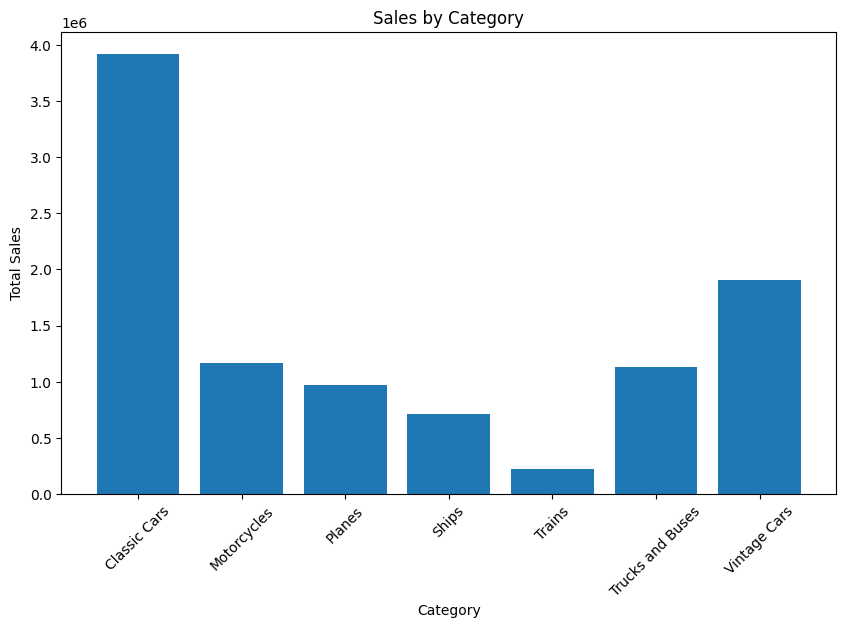

In [39]:
import matplotlib.pyplot as plt

# Group data by PRODUCTLINE and sum up the sales
sales_by_category = data.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

# Plot the sales data by category
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category['PRODUCTLINE'], sales_by_category['SALES'])
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


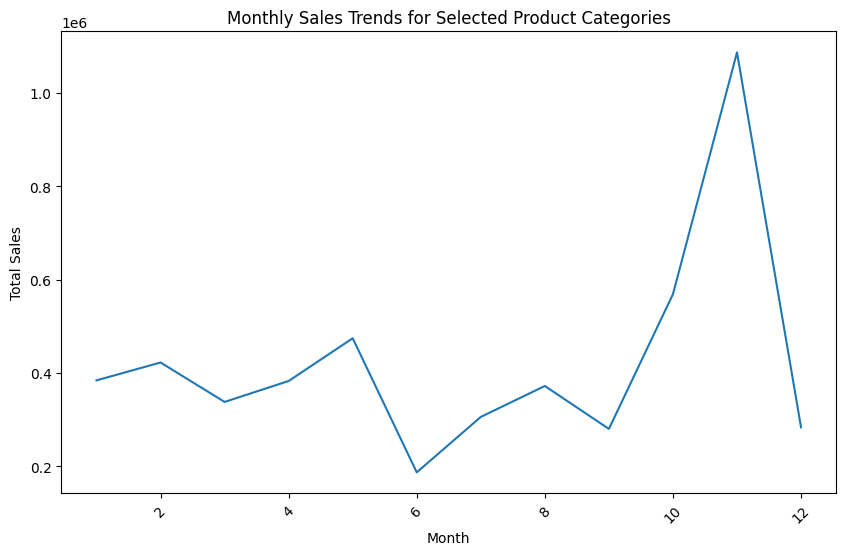

In [40]:
# List of selected categories
selected_categories = ['Motorcycles', 'Classic Cars']

# Filter data for selected categories
filtered_data = data[data['PRODUCTLINE'].isin(selected_categories)]

# Analyze sales trends over time
monthly_sales_trend = filtered_data.groupby('MONTH_ID')['SALES'].sum()

# Visualize sales trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
monthly_sales_trend.plot(kind='line')
plt.title('Monthly Sales Trends for Selected Product Categories')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Sales Trend Analysis focused on Classic Cars and Motorcycle categories, revealing peak sales during holidays and intermittent dips. These insights can guide resource allocation and inventory management strategies.



##Conclusion

The Jupyter Notebook seamlessly integrates SQL and Python for data extraction, transformation, analysis, and visualization. Each analysis step provides valuable insights, empowering data-driven decisions and strategic planning in the realm of retail analytics.